In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.pyplot import rcParams

In [2]:
rcParams.update({'font.family':'Arial','font.size':22})

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("annotation_file.txt",sep="\t",index_col=0)

In [5]:
with open("signatures_geneids.txt","w") as f1:
    with open("signatures.txt") as f:
        for line in f:
            s = ""
            a = line[:-1].split("\t")
            s = a[0]+"\t"+">NAN"
            for i in a[2:]:
                df_new = df[df["external_gene_name"] == i]
                if len(list(df_new.index)) == 0:
                    continue
                s = s + "\t" + df_new.index[0]
            f1.write(s+"\n")


In [6]:
g = []
with open("signatures.txt") as f:
    for line in f:
        s = ""
        a = line[:-1].split("\t")
        s = a[0]+"\t"+">NAN"
        for i in a[2:]:
            df_new = df[df["external_gene_name"] == i]
            if len(list(df_new.index)) == 0:
                continue
            s = s + "\t" + df_new.index[0]
            g.append(df_new.index[0])

In [19]:
ss = ""
for i in g:
    print(i)
    ss = ss+'"'+i+'",'
#print(ss)
ss[0:3]

ENSG00000010278
ENSG00000105963
ENSG00000143153
ENSG00000162105
ENSG00000008283
ENSG00000099219
ENSG00000139832
ENSG00000105357
ENSG00000014216
ENSG00000132746
ENSG00000204616
ENSG00000047365
ENSG00000172830
ENSG00000003147
ENSG00000050327
ENSG00000012779
ENSG00000173156
ENSG00000184012
ENSG00000129422
ENSG00000186529
ENSG00000166387
ENSG00000152061
ENSG00000196576
ENSG00000085871
ENSG00000184669
ENSG00000167880
ENSG00000117335
ENSG00000171346
ENSG00000142675
ENSG00000095585
ENSG00000093010
ENSG00000196975
ENSG00000161955
ENSG00000197822
ENSG00000109062
ENSG00000100219
ENSG00000026025
ENSG00000148516
ENSG00000142227
ENSG00000151835
ENSG00000167601
ENSG00000134013
ENSG00000113140
ENSG00000022267
ENSG00000073712
ENSG00000167552
ENSG00000249992
ENSG00000122786
ENSG00000100097
ENSG00000109099
ENSG00000147065
ENSG00000140632
ENSG00000131711
ENSG00000182287
ENSG00000152661
ENSG00000184014
ENSG00000198467
ENSG00000176014
ENSG00000101955
ENSG00000145362
ENSG00000128656
ENSG00000111252
ENSG0000

'"EN'

In [7]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import zscore

In [8]:
df_meta = pd.read_csv("metadata.txt",sep="\t",index_col=0).to_dict('index')

In [9]:
for i in df_meta:
    df_meta[i] = df_meta[i]["subtype"]

In [10]:
df_meta

{'AU565': 'H',
 'BT20': 'TNA',
 'BT474': 'LB',
 'BT483': 'LA',
 'BT549': 'TNB',
 'CAL51': 'TNB',
 'CAL851': 'TNB',
 'CAMA1': 'LA',
 'DU4475': 'TNA',
 'EFM19': 'LA',
 'EVSAT': 'H',
 'HCC1143': 'TNA',
 'HCC1187': 'TNA',
 'HCC1500': 'LA',
 'HCC1937': 'TNA',
 'HCC1954': 'H',
 'HCC38': 'TNB',
 'HCC70': 'TNA',
 'HDQP1': 'TNB',
 'HS578T': 'TNB',
 'JIMT1': 'H',
 'KPL1': 'LA',
 'MCF12A': 'Basal-like',
 'MCF7': 'LA',
 'MDAMB361': 'LB',
 'MDAMB415': 'LA',
 'MDAMB436': 'TNA',
 'MDAMB453': 'H',
 'MDAMB468': 'TNA',
 'MX1': 'TNB',
 'T47D': 'LA',
 'ZR751': 'LA'}

In [11]:
df = pd.read_csv("selected_imputed_genes.txt",sep="\t",index_col=0)
df = df.T

In [12]:
cells = [i.split("_")[0] for i in list(df.index)]

In [13]:
df["cellline"] = cells

In [14]:
df = df.T

In [15]:
with open("signatures_geneids.txt") as f:
    for line in f:
        a = line[:-1].split("\t")
        print(a[0])
        df_temp = df[a[2:]]
        df_temp = df_temp.apply(zscore)
        df[a[0]] = df_temp.mean(axis=1)

Epithelial_cell_line_signature


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [17]:
plt.rcParams["figure.figsize"] = (10,8)
g1 = "Epithelial_cell_line_signature"
g2 = "pEMT"
sns.scatterplot(df[g1],df[g2],hue=df["subtype"],palette=["#107C10","#F7542E","#F80E34","#1AA7EC","#1E2F97","#C80B6C"],s=4,linewidth=0)
plt.legend('',frameon=False)
print(ss.pearsonr(df[g1],df[g2]))
#plt.savefig("EpiLplot_-0.557.png",dpi=800)
#["#107C10","#F7542E","#F80E34","#1AA7EC","#1E2F97","#C80B6C"]

KeyError: 'subtype'

In [111]:
df["subtype"] = df["cellline"].map(df_meta)

In [78]:
df

,ENSG00000010278,ENSG00000105963,ENSG00000143153,ENSG00000162105,ENSG00000008283,ENSG00000099219,ENSG00000139832,ENSG00000105357,ENSG00000014216,ENSG00000132746,...,Mesenchymal_cell_line_signature,Epithelial_tumour_signature,Mesenchymal_tumour_signature,basal_breast_cancer,luminal_breast_cancer,pEMT,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_GLYCOLYSIS,FAO,subtype
AU565_AAACCAGTTTGG,1.7393,0.0156,1.5206,0.0413,0.6600,0.1164,0.3536,0.0258,0.4962,0.2365,...,-0.629182,0.073554,-0.370933,-0.473292,-0.048754,-0.533405,0.369761,-0.134937,0.356120,H
AU565_AAACGTGCAGCG,1.8663,0.0101,1.5495,0.0377,0.6830,0.1096,0.3683,0.0455,0.5678,0.2325,...,-0.608073,0.071298,-0.372069,-0.376707,-0.091328,-0.525904,0.477060,-0.056260,0.402628,H
AU565_AAAGCCACATGC,1.7644,0.0461,1.5200,0.0546,0.6503,0.0757,0.4161,0.0362,0.4816,0.2806,...,-0.627692,0.113111,-0.383945,-0.605066,-0.039341,-0.582914,0.478011,-0.170603,0.528691,H
AU565_AAAGTCGGCTGG,1.7645,0.0086,1.4542,0.0350,0.6985,0.1237,0.3967,0.0384,0.4558,0.2370,...,-0.627402,0.058014,-0.393049,-0.455542,-0.078204,-0.532424,0.409805,-0.131092,0.299625,H
AU565_AAAGTGCCTAAA,1.6859,0.0085,1.7806,0.1077,0.7655,0.1604,0.4252,0.0405,0.5325,0.2425,...,-0.615488,0.319084,-0.356873,-0.714980,0.038116,-0.505183,0.519513,-0.064630,0.614484,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDAMB453_TTTGGAGATGGT,2.4597,0.0008,0.8263,0.0340,0.7678,0.0500,0.1724,0.0485,0.1456,0.4176,...,-0.567815,0.117226,-0.310266,-0.451299,0.428496,-0.314491,-0.153044,-0.163891,-0.362078,H
MDAMB453_TTTGTCTTACTT,2.3866,0.0066,0.9023,0.1742,0.8018,0.0701,0.1793,0.0473,0.2034,0.3859,...,-0.511697,0.445361,-0.273070,0.525401,0.413867,-0.187190,0.358447,0.137298,0.376006,H
MDAMB453_TTTTAGACGCCA,2.3707,0.0000,0.9113,0.1638,0.5471,0.0452,0.1237,0.1029,0.1337,0.2770,...,-0.577312,0.104331,-0.312991,-0.010637,0.353584,-0.329337,-0.050699,0.008137,0.011767,H
MDAMB453_TTTTGGAGGCAA,2.5368,0.0015,0.9005,0.1180,0.8069,0.0729,0.1577,0.0620,0.1396,0.4748,...,-0.520350,0.426121,-0.285878,0.097486,0.472397,-0.246158,0.181522,0.010362,0.228531,H


c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.9308802415032992, 0.0)


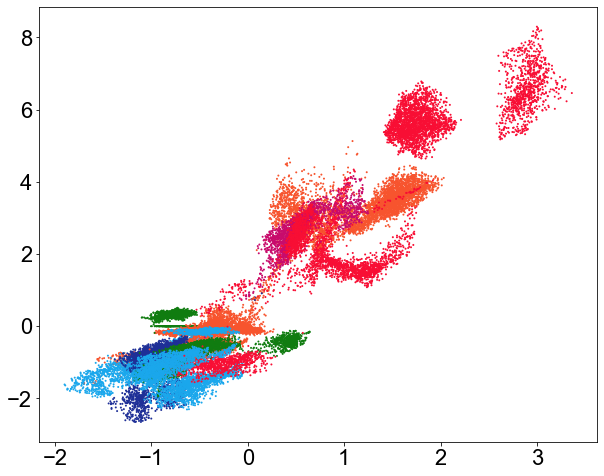

In [220]:
plt.rcParams["figure.figsize"] = (10,8)
sns.scatterplot(df["Mesenchymal_cell_line_signature"]-df["Epithelial_cell_line_signature"],df["ENSG00000026025"]-df["ENSG00000039068"],hue=df["subtype"],palette=["#107C10","#F7542E","#F80E34","#1AA7EC","#1E2F97","#C80B6C"],s=4,linewidth=0)
plt.legend('',frameon=False)
print(ss.pearsonr(df["Mesenchymal_cell_line_signature"]-df["Epithelial_cell_line_signature"],df["ENSG00000026025"]-df["ENSG00000039068"]))
plt.savefig("EM_CDH1VIM.png",dpi=800)

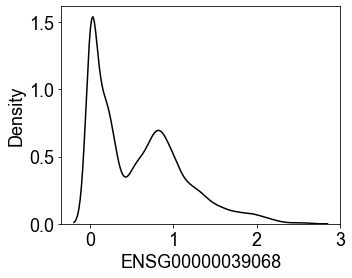

In [285]:
plt.rcParams["figure.figsize"] = (5,4)
sns.kdeplot(df["ENSG00000039068"],color="black")
#plt.axvline(x=0.95,color="red")
#plt.axvline(x=4.6,color="red")
plt.savefig("CV_hist.png",dpi=800)

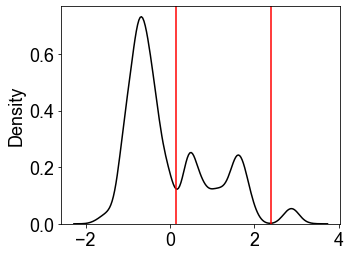

In [281]:
plt.rcParams["figure.figsize"] = (5,4)
sns.kdeplot(df["Mesenchymal_cell_line_signature"]-df["Epithelial_cell_line_signature"],color="black")
plt.axvline(x=0.15,color="red")
plt.axvline(x=2.4,color="red")
plt.savefig("EM_hist.png",dpi=800)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LA'),
  Text(1, 0, 'LB'),
  Text(2, 0, 'TNA'),
  Text(3, 0, 'TNB'),
  Text(4, 0, 'Basal-like'),
  Text(5, 0, 'H')])

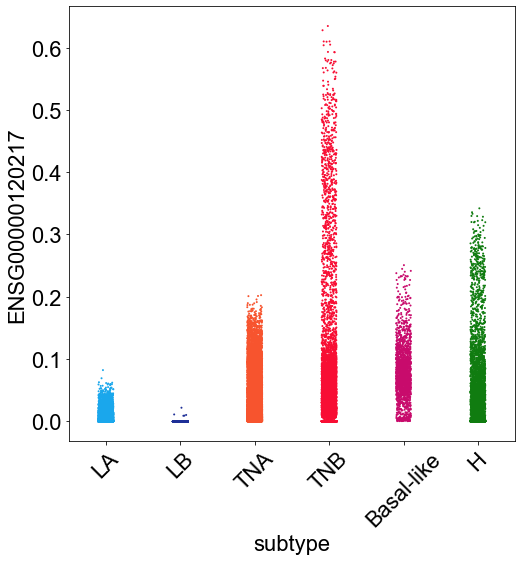

In [199]:
plt.rcParams["figure.figsize"] = (8,8)
sns.stripplot(df["subtype"],df["ENSG00000120217"],s=2,palette=["#1AA7EC","#1E2F97","#F7542E","#F80E34","#C80B6C","#107C10"], order=["LA","LB","TNA","TNB","Basal-like","H"])
plt.xticks(rotation = 45)
#plt.ylim([-1.1,3.1])
#plt.savefig("Mes.png",dpi=800)

In [239]:
phen_CV = []
phen_EM = []
for i in df.iterrows():
    CDH1_VIM_score = i[1]["ENSG00000026025"]-i[1]["ENSG00000039068"]
    Epi_Mes_score = i[1]["Mesenchymal_cell_line_signature"]-i[1]["Epithelial_cell_line_signature"]
    if CDH1_VIM_score < 0.95:
        phen_CV.append("E")
    elif CDH1_VIM_score > 4.6:
        phen_CV.append("M")
    elif (CDH1_VIM_score < 4.6) and (CDH1_VIM_score > 0.95):
        phen_CV.append("H")
    if Epi_Mes_score < 0.15:
        phen_EM.append("E")
    elif Epi_Mes_score > 2.4:
        phen_EM.append("M")
    elif (Epi_Mes_score < 2.4) & (Epi_Mes_score > 0.15):
        phen_EM.append("H")
df["phen_CV"] = phen_CV
df["phen_EM"] = phen_EM

In [263]:
xCV = df.groupby('subtype')['phen_EM'].value_counts()
xCV

subtype     phen_EM
Basal-like  H          1708
            E            36
H           E          3817
            H           530
LA          E          7565
LB          E          2911
TNA         E          7532
            H          4188
TNB         H          5038
            E          1072
            M           879
Name: phen_EM, dtype: int64

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), [Text(0, 0, 'E'), Text(1, 0, 'H'), Text(2, 0, 'M')])

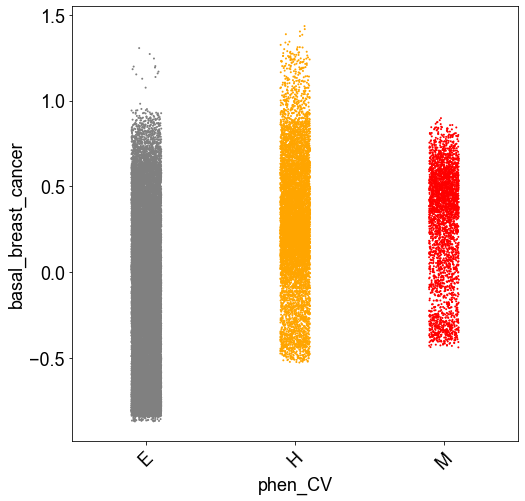

In [269]:
plt.rcParams["figure.figsize"] = (8,8)
sns.stripplot(df["phen_CV"],df["basal_breast_cancer"],s=2,palette=["gray","orange","red"], order=["E","H","M"])
plt.xticks(rotation = 45)

In [264]:
rcParams.update({'font.family':'Arial','font.size':18})
plt.rcParams['figure.figsize'] = [5, 4]
ifnlow_stats = pd.read_csv("freq_subtype_EM.txt",sep="\t",index_col=0)
ifnlow_stats.plot(kind='bar', stacked=True, color=['gray', 'orange','red'])
plt.ylim([0,1])
plt.legend('',frameon=False)
plt.savefig("freq_subtype_EM.png",dpi=800)
plt.close()


In [278]:
xCV = df.groupby('cellline')['phen_EM'].value_counts()
xCV

cellline  phen_EM
AU565     E           596
BT20      E           638
BT474     E          2158
BT483     E           385
BT549     H          2296
CAL51     H          1216
          E            44
CAL851    E           976
          H            19
CAMA1     E           823
DU4475    E           411
          H             4
EFM19     E          1316
EVSAT     E           441
HCC1143   H          1273
          E             7
HCC1187   E          1056
          H            91
HCC1500   E           615
HCC1937   E          1028
HCC1954   E          1623
HCC38     H           629
HCC70     E          2818
HDQP1     H            61
          E            49
HS578T    M           879
JIMT1     H           530
          E            38
KPL1      E           942
MCF12A    H          1708
          E            36
MCF7      E           839
MDAMB361  E           753
MDAMB415  E           877
MDAMB436  H          2820
          E             1
MDAMB453  E          1119
MDAMB468  E         

In [279]:
rcParams.update({'font.family':'Arial','font.size':18})
plt.rcParams['figure.figsize'] = [12, 5]
ifnlow_stats = pd.read_csv("freq_cellline_EM.txt",sep="\t",index_col=0)
ifnlow_stats.plot(kind='bar', stacked=True, color=['gray', 'orange','red'])
plt.ylim([0,1])
plt.legend('',frameon=False)
plt.savefig("freq_cellline_EM.png",dpi=800)
plt.close()